<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

# Week 1 - Images as signals
---


The first part of this week's exercises will focus on loading images, grayscaling, binarizing images, doing histogram equalization, and calculating color distributions in images. The second part is a short primer on distance measures in vector spaces, what defines them, and some exercises on how to implement them

At the end of this week, you should be able to:

- Explain how matrices relate to images
- Explain the mathematical difference between grayscale and colored images
- Convert an RGB image to grayscale
- Binarize a grayscaled image
- Explain histogram equalization and how the cumulative density function (CDF) relates to it
- Use histogram equalization to "fix" off-contrast images
- Explain how the CDF of an RGB image can tell us about its color content
- Explain what a distance measure is
- Explain the mathematical requirements of a distance measure, for example why the cosine similarity is not a "true" distance measure
- Implement distance measures like the Manhattan. Euclidian, and the Minkowski 

---

## Part 1: Image representation

As mentioned, images come in many different flavors ranging from pictures of artwork to LIDAR topography maps. In general, an image can be represented as a $N \times M \times C$ matrix of pixel intensities. N and M are the height and width of the image repsectively, while C is the number of **channels**.

$$
\mathbf{A} = \begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1M} \\
a_{21} & a_{22} & \cdots & a_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N1} & a_{N2} & \cdots & a_{NM}
\end{pmatrix}
$$

The above would correspond to a **grayscale** image. Each index is therefore the intensity of the given pixel in the image. With RGB images, we need to add more channels to hold the different colors. 

$$
\mathbf{A}_{RGB} = 
\begin{bmatrix}
\begin{pmatrix}
R_{11} & R_{12} & \cdots & R_{1M} \\
\vdots & \vdots & \ddots & \vdots \\
R_{N1} & R_{N2} & \cdots & R_{NM}
\end{pmatrix} \

\begin{pmatrix}
G_{11} & G_{12} & \cdots & G_{1M} \\
\vdots & \vdots & \ddots & \vdots \\
G_{N1} & G_{N2} & \cdots & G_{NM}
\end{pmatrix} \

\begin{pmatrix}
B_{11} & B_{12} & \cdots & B_{1M} \\
\vdots & \vdots & \ddots & \vdots \\
B_{N1} & B_{N2} & \cdots & B_{NM}
\end{pmatrix}
\end{bmatrix}
$$

The above would correspond to an RGB image, each index in the $R$ matrix would then be the intensity of red in the image, likewise for green intensity and $G$, and red intensity and $R$. Note that each of $R$, $G$, and $B$ need to have identical $N$ and $M$.

We can keep adding more channels to hold more information, you may have heard of an **alpha channel** whose values denote transparency. Later in CNN's, we will see how using even more channels can hold more specific information about images.


</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL.Image as Image
from math import ceil

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

### Loading images

For this course, we will use Pillow for loading and handling of images. Some courses on DTU (for example computer vision) use CV2, but due to the (purely empirical) prevalence of Pillow used in Machine Learning applications, we will use it whenever necessary.

Whenever it is *not* necessary to load images as... images, we will treat them purely as either **numpy arrays** or **torch tensors**. Pillow is needed **only** for image-specific operations where the pure matrix representation would be too cumbersome.

</span>

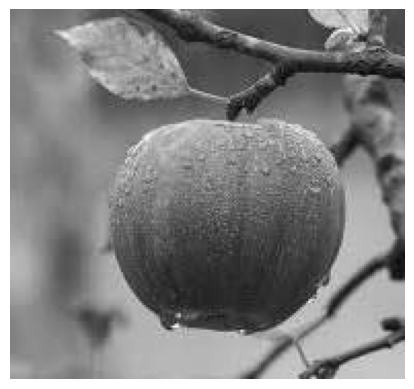

Image shape (height, width): (180, 192)


In [3]:
apple_image_path = os.path.join('images', 'image_gray.jpg')
image_gray = np.array(Image.open(apple_image_path).convert('L'))
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()
print("Image shape (height, width):", image_gray.shape)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 1: Binarize and threshold

As mentioned in the slides, we can also consider binary images where pixels are either "off" or "on". We determine whether a pixel is off or on based on the whether its original pixel value is smaller or larger than a given threshold

---

#### **1.1. 💻 Complete the function below to create a binarized image of the above image given a specific threshold**

#### **1.2. 💻 Complete the second function below to grayscale a given RGB image**

#### **1.3. Is is possible to binarize RGB images? How could this work? Discuss**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Yes it is possible to binarize RGB images, but to do this, you need first to gray scale the image and after this you can use a threshold to make a binaryrised image $\dots$ 

</span>

</span>

In [22]:
def binarize_with_thresholding(image, threshold, binary_values=[255, 0]):
    """
    Binarize an image based on a given threshold.


    Args:
        image (np.ndarray): np array representing a grayscaled image
        threshold (int): Value so that if a pixel is above this, it will be considered 'on' otherwise it will be 'off' 
        binary_values (list, optional): List where the first element is the actual value 'on' pixels will be set to, second is value for the 'off' elements [255, 0].

    Returns:
        binarized_image (np.ndarray): np array representing the image, now binarized 
    """

    # Find all pixels that are above the given threshold
    pixels_above_threshold = ...

    # Create the binarized image by setting all pixels above threshold to 255, and all pixels below to 0
    binarized_image = image.copy()

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] > threshold:
                binarized_image[i,j] = 255
            else: 
                binarized_image[i,j] = 0

    return binarized_image

def rgb_to_grayscale(image):
    """
    Grayscale an RGB image

    Args:
        image (np.ndarray): np array representing the RGB image, must be of shape (n, m, c) 

    Returns:
        imag_grayscaled (np.ndarray): np array representing the now grayscaled image, should be of shape (n, m)
    """

    # Use the mean of color channels to find the grayscaled image
    image_grayscaled = np.mean(image,axis=2)

    return image_grayscaled


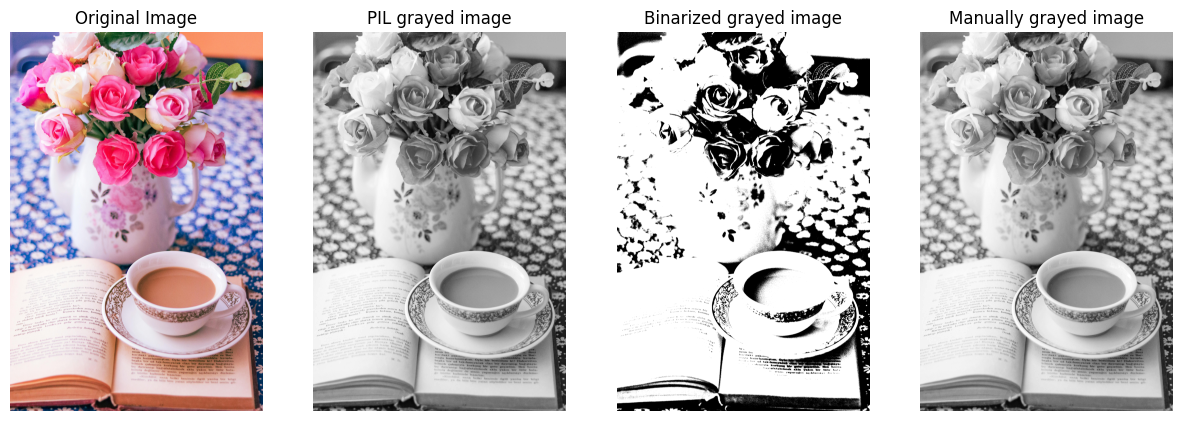

Original image shape (height, width, channels): (6000, 4000, 3)
PIL grayed image shape (height, width): (6000, 4000)
Manually grayed image shape (height, width): (6000, 4000)
Binarized image shape (height, width): (6000, 4000)


In [21]:
# Now plotting a few images using the function

original_image_path = os.path.join('images', 'img_1.jpg')

# Load as normal using PIL, this will get the RGB image
original_image = Image.open(original_image_path)

# Load and use PIL.Image.convert('L') to convert to grayscale
original_image_PIL_grayed = original_image.convert('L')

# Unlike say CV2 objects, PIL objects cannot be treated as numpy arrays. We convert them to numpy for easier plotting and handling
original_image = np.array(original_image)
original_image_PIL_grayed = np.array(original_image_PIL_grayed)

# Create a figure and axis for each image
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(original_image, vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(original_image_PIL_grayed, cmap='gray', vmin=0, vmax=255) # cmap='gray' is used to display the image in grayscale
axs[1].set_title('PIL grayed image')
axs[1].axis('off')

# Get the manually binarized image
binarized_image = binarize_with_thresholding(original_image_PIL_grayed, threshold=int(255/2))

axs[2].imshow(binarized_image, cmap='gray', vmin=0, vmax=255) # Same as above, cmap gray
axs[2].set_title('Binarized grayed image')
axs[2].axis('off')

# Get the manually grayed image
image_manually_grayed = rgb_to_grayscale(original_image)

axs[3].imshow(image_manually_grayed, cmap='gray', vmin=0, vmax=255) # Same as above, cmap gray
axs[3].set_title('Manually grayed image')
axs[3].axis('off')

plt.show()

print("Original image shape (height, width, channels):", original_image.shape)
print("PIL grayed image shape (height, width):", original_image_PIL_grayed.shape)
print("Manually grayed image shape (height, width):", image_manually_grayed.shape)
print("Binarized image shape (height, width):", image_manually_grayed.shape)



<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 2: Image combinations

---

#### **2.1. How many possible images do we have if we choose a non-binary $28 \times 28$ image, using 8-bit values to represent pixel intensities?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

(we know that it is noon binary with $28x28$ pixels and it uses 8-bit values and each bit can have 2 values (on or off state), so first we know there is $2^8$ possibles states and $784$ pixels so now we know that we can have 256 power of 784 images) $256^{784}$ $\dots$

</span>


#### **2.2. How many if we choose to use a continuous scale, simply the real numbers for representing pixel intensities instead?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

We can have infinate images because we are using the real numbers and where it is a continuous scale $\dots$

</span>

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

### Creating contrasted images

To create either high- or low-constrast images, we will implement functions below to first normalize an image's pixel values to a certain range, and thereafter, increase or decrease the contrast of that image.

We use the below functions in an exercise further below, you may, but are not required to read and understand them.

</span>

In [28]:
def squash_image(image, target_range=(0, 255)):
    """
      Normalize the pixel values of an image to a specific range.


    Args:
        image (np.ndarray): np array representing the image
        target_range (tuple, optional): Tuple representing the target range (min, max). Defaults to (0, 255).

    Returns:
        normalized_image np.ndarray: np array with pixel values normalized to the target range
    """

    # Get the min and max values of the original image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Calculate the scale and shift to squash the values
    scale = (target_range[1] - target_range[0]) / (max_val - min_val)
    shift = target_range[0] - min_val * scale
    
    # Apply the scaling and shifting
    normalized_image = image * scale + shift
    
    # Clip values to ensure they are within the target range
    normalized_image = np.clip(normalized_image, target_range[0], target_range[1])
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    normalized_image = normalized_image.astype(np.uint8)
    
    return normalized_image


def set_contrast(image, contrast_factor):
    """
        Adjust the contrast of an image.


    Args:
        image (np.ndarray): np array representing the image
        contrast_factor (float): Float value where 1.0 means no change, less than 1.0 decreases contrast
          and greater than 1.0 increases contrast
        

    Returns:
        contrast_image: np array with adjusted contrast
    """

    # Calculate the mean pixel value
    mean = np.mean(image)
    
    # Adjust contrast
    contrast_image = (image - mean) * contrast_factor + mean
    
    # Clip values to ensure they are within the valid range
    contrast_image = np.clip(contrast_image, 0, 255)
    
    # Convert to the appropriate data type (e.g., uint8 for images with range [0, 255])
    contrast_image = contrast_image.astype(np.uint8)
    
    return contrast_image

In [29]:
# Now apply the functions (you will see the images in further exercises):
image_gray = np.array(Image.open(apple_image_path).convert('L'))
dark_image = squash_image(image_gray, target_range=(0, 50))
bright_image = squash_image(image_gray, target_range=(200, 255))
low_contrast_image = set_contrast(image_gray, contrast_factor=0.5)
high_constrast_image = set_contrast(image_gray, contrast_factor=1.5)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 3 Histogram equalization

When faced with images that are too bright or too dark or have too high or low contrast, we can use histogram equalisation in order to scale the image. In this exercise you will implement a function that does exactly that. 

---

#### **3.1. 💻 Complete the function below to do histogram equalization on a grayscale image. You can use the following mathematical description of histogram equalisation:**

<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

Let $ I(x, y) $ represent the intensity of the pixel at position $ (x, y) $ in the original image.
The intensity values range from $ 0 $ to $ L-1 $, where $ L $ is the number of possible intensity levels (e.g., $ L = 256 $ for an 8-bit grayscale image).
The probability density function (PDF) of the intensity values is denoted as $ p_I(i) $, where $ i $ is an intensity value and $ p_I(i) $ is the probability that a randomly selected pixel has intensity $ i $.
The cumulative distribution function (CDF) of the intensity values is denoted as $ c_I(i) $.
**Steps for Histogram Equalization**
1. **Calculate the PDF:**
   $$
   p_I(i) = \frac{\text{number of pixels with intensity } i}{\text{total number of pixels}}
   $$

2. **Calculate the CDF:**
   $$
   c_I(i) = \sum_{j=0}^{i} p_I(j)
   $$
   The CDF $ c_I(i) $ represents the cumulative sum of the PDF up to intensity $ i $.

3. **Transformation Function:**
   The new intensity value $ I_{\text{eq}}(x, y) $ for each pixel is obtained using the transformation function:
   $$
   I_{\text{eq}}(x, y) = (L-1) \cdot c_I(I(x, y))
   $$
   This equation maps the original intensity values to new values based on the CDF, effectively spreading the intensity values over the entire range.

</span>

#### **3.2. If an image has $x$ unique pixel values before histogram equalisation, how many will it have after?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

In [35]:
def histogram_equalisation(image):
    """
    Perform histogram equalization on a grayscale image.

    Parameters:
    image (numpy.ndarray): Input grayscale image.

    Returns:
    numpy.ndarray: Histogram-equalized image.
    """
    
    # Step 1: Calculate the histogram of the image
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    # Step 2: Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF to be between 0 and 255
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # Step 3: Use the values of the CDF to map the original image intensities to the equalized values
    image_equalized = cdf_normalized[image]
    
    return image_equalized

Now we use the following plotting function to display the results for each of our 4 images:

In [36]:
def display_image_hist_and_cdf(image_gray, name=''):
    
    # Create a figure with three subplots
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    # Display the equalized image
    ax[0].imshow(image_gray, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title(f'Histogram Equalized Image {name}')
    ax[0].axis('off')  # Hide axes
    
    # Plot the histogram
    hist, bins = np.histogram(image_gray.flatten(), 256, [0, 256])
    ax[1].bar(range(256), hist, color='gray', width=1)
    ax[1].set_title('Histogram')
    ax[1].set_xlim([0, 255])
    ax[1].set_xlabel('Pixel Intensity')
    ax[1].set_ylabel('Frequency')
    
    # Plot the CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()
    ax[2].plot(cdf_normalized, color='blue')
    ax[2].set_title('Cumulative Distribution Function (CDF)')
    ax[2].set_xlim([0, 255])
    # ax[2].set_ylim([0, 1])
    ax[2].set_xlabel('Pixel Intensity')
    ax[2].set_ylabel('Cumulative Probability')
    
    plt.tight_layout()
    plt.show()
    

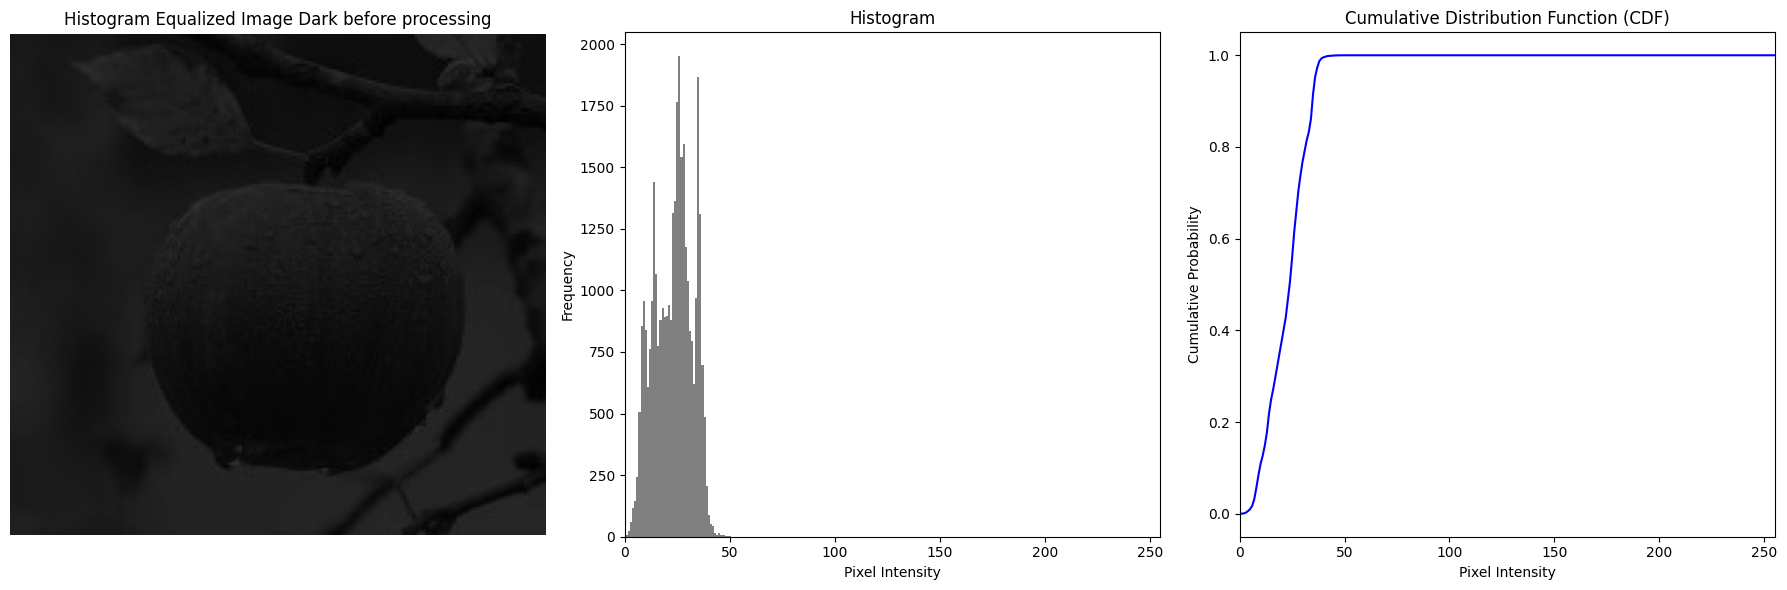

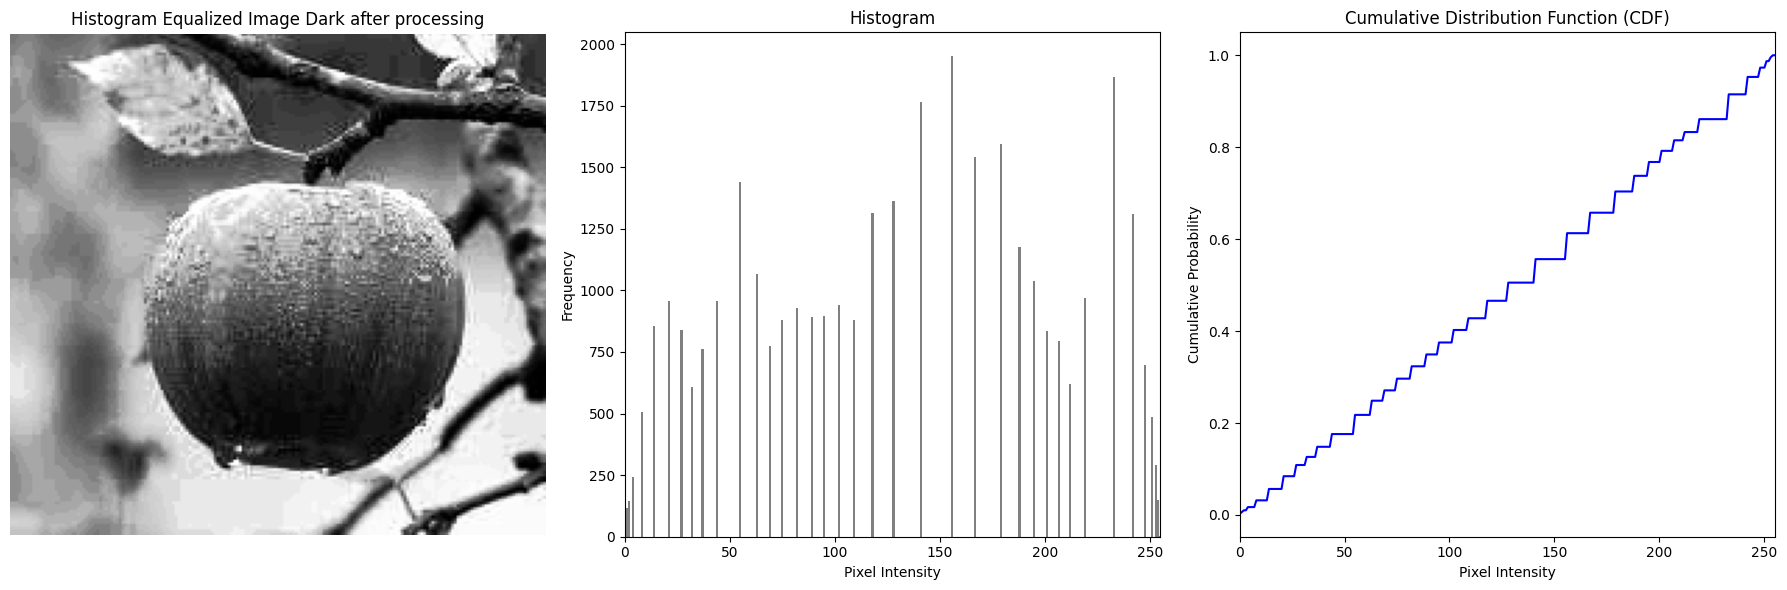

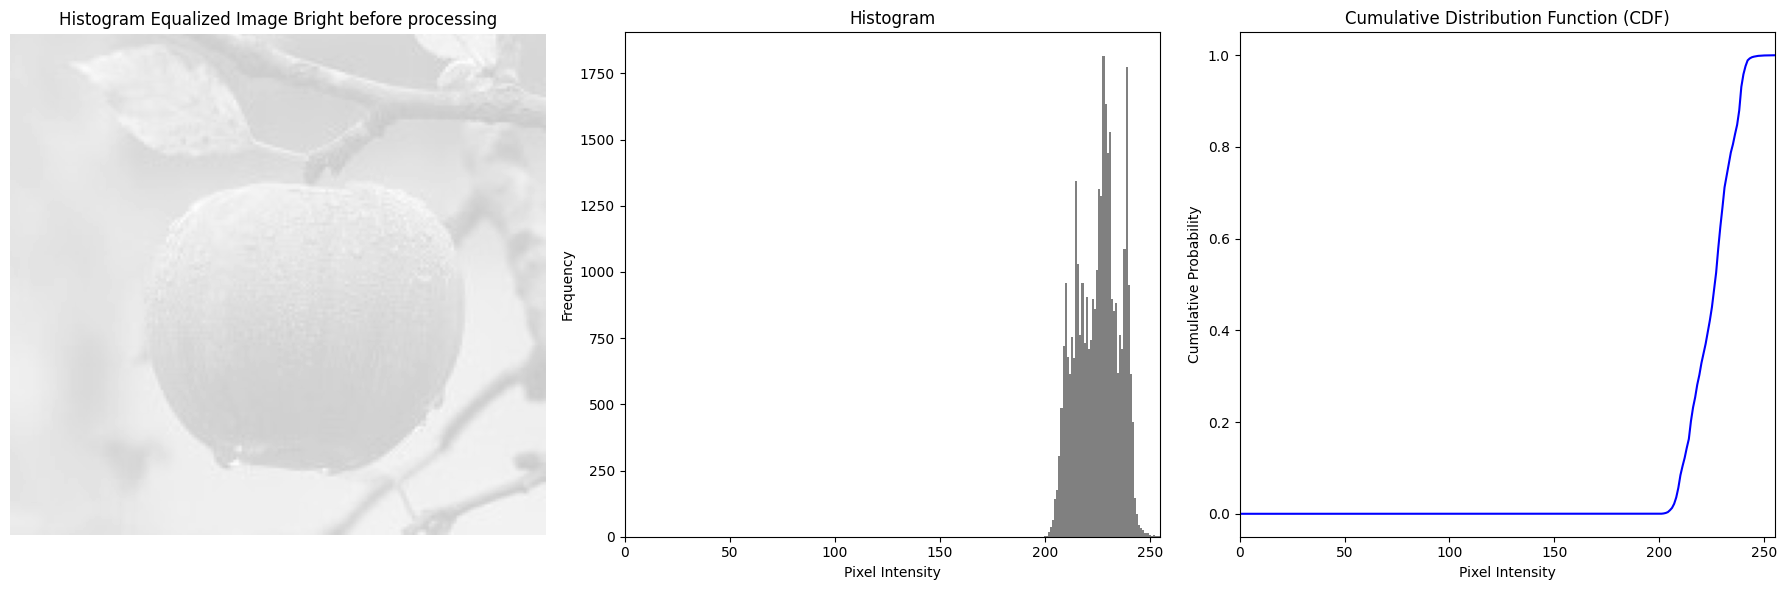

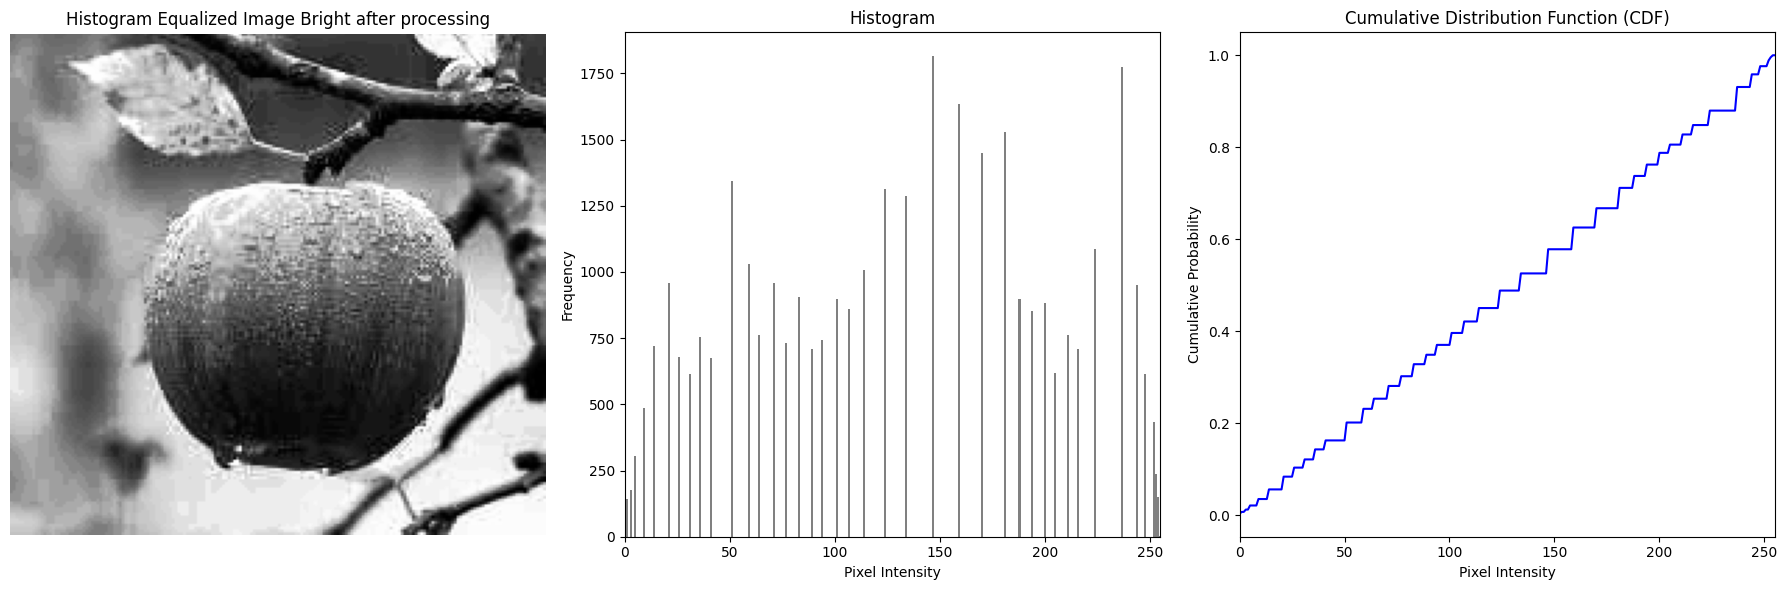

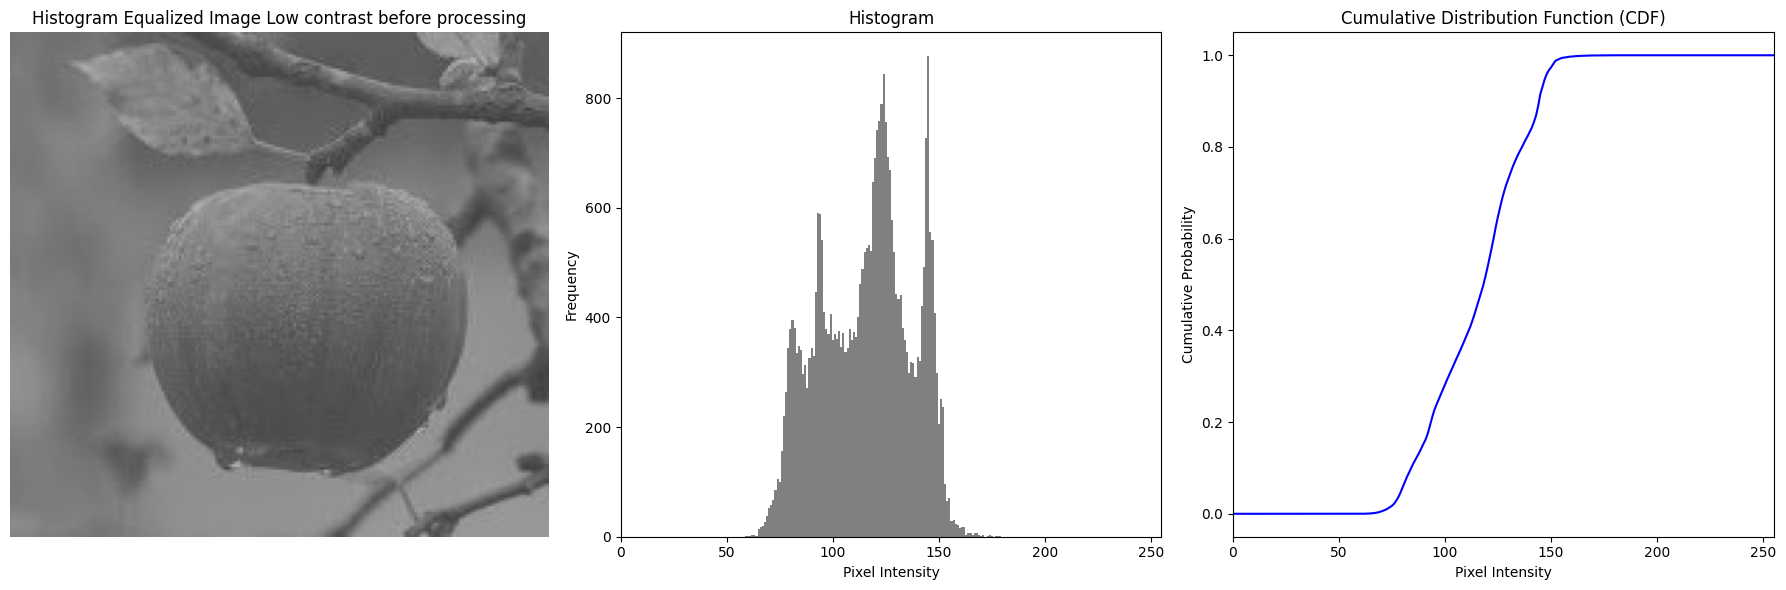

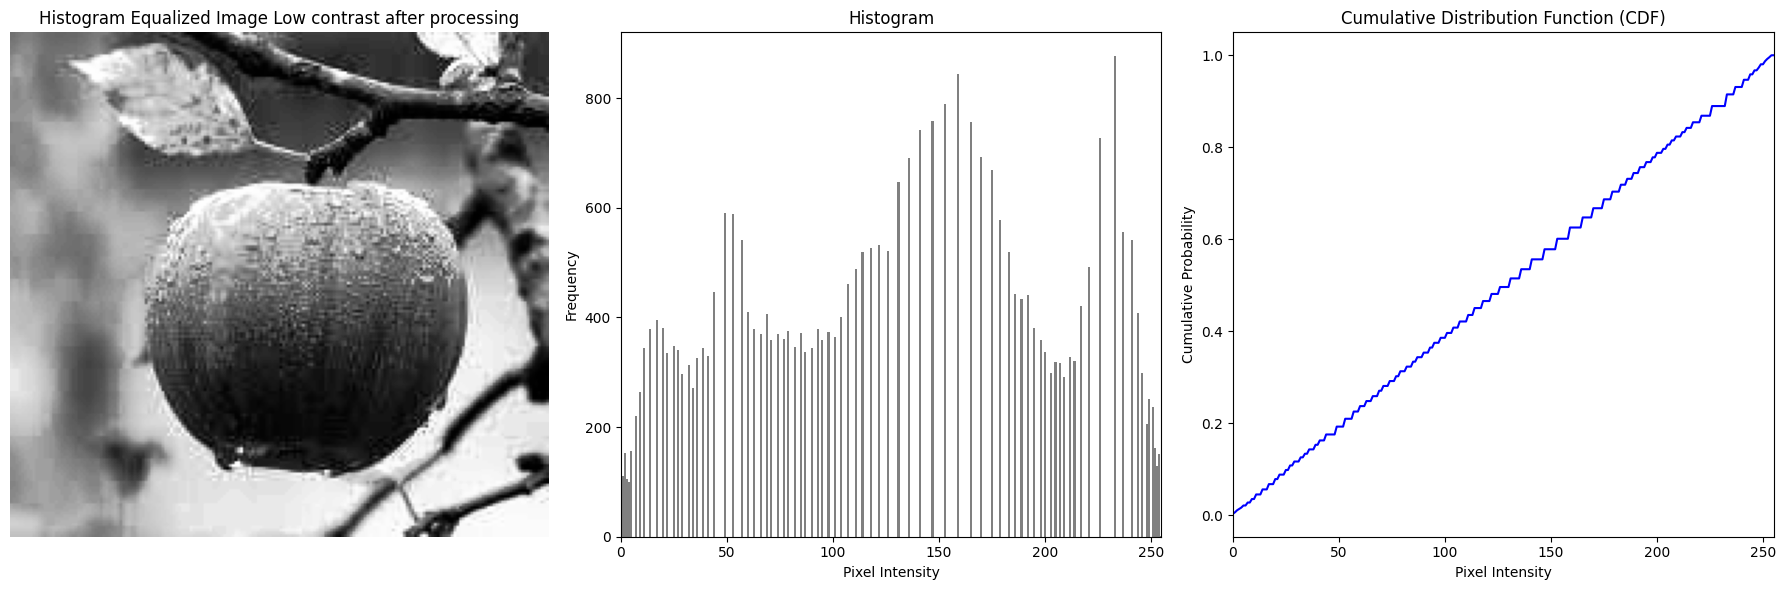

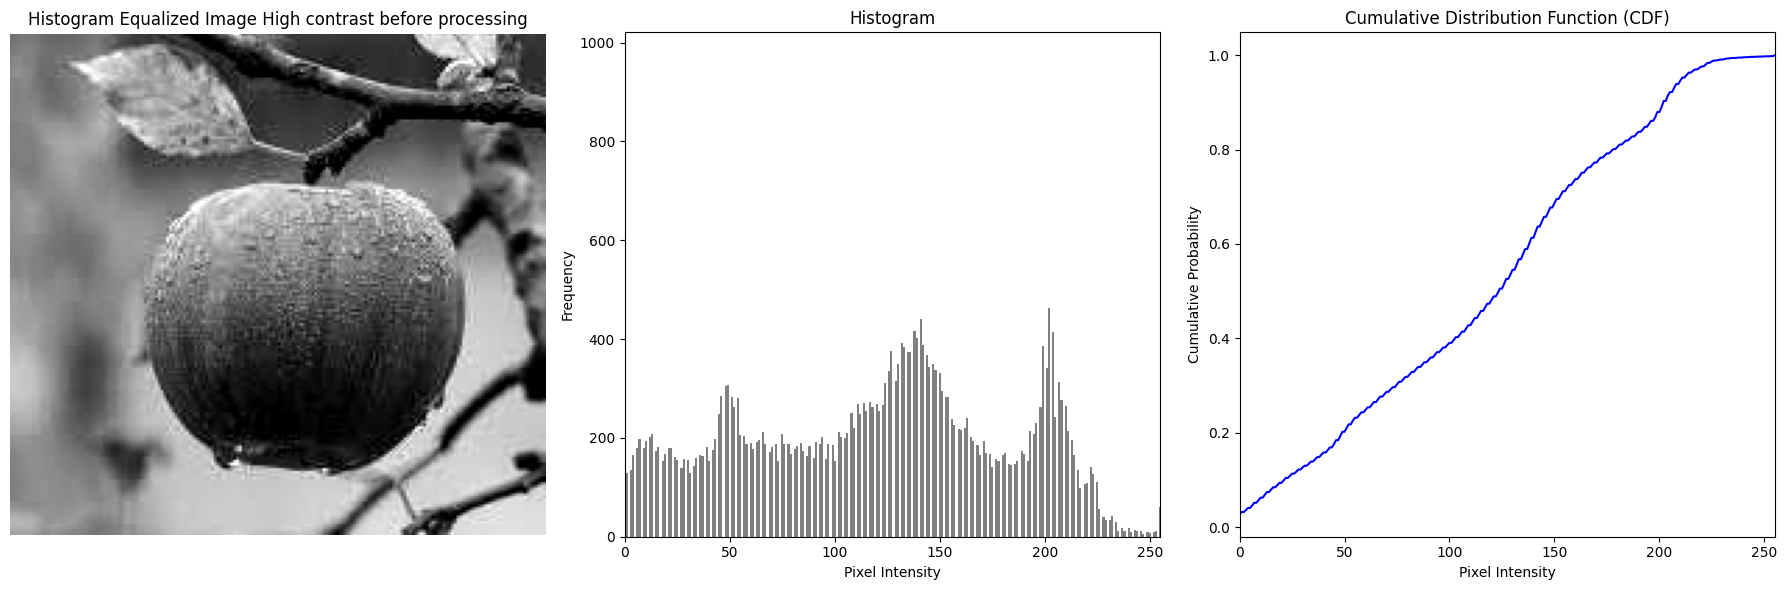

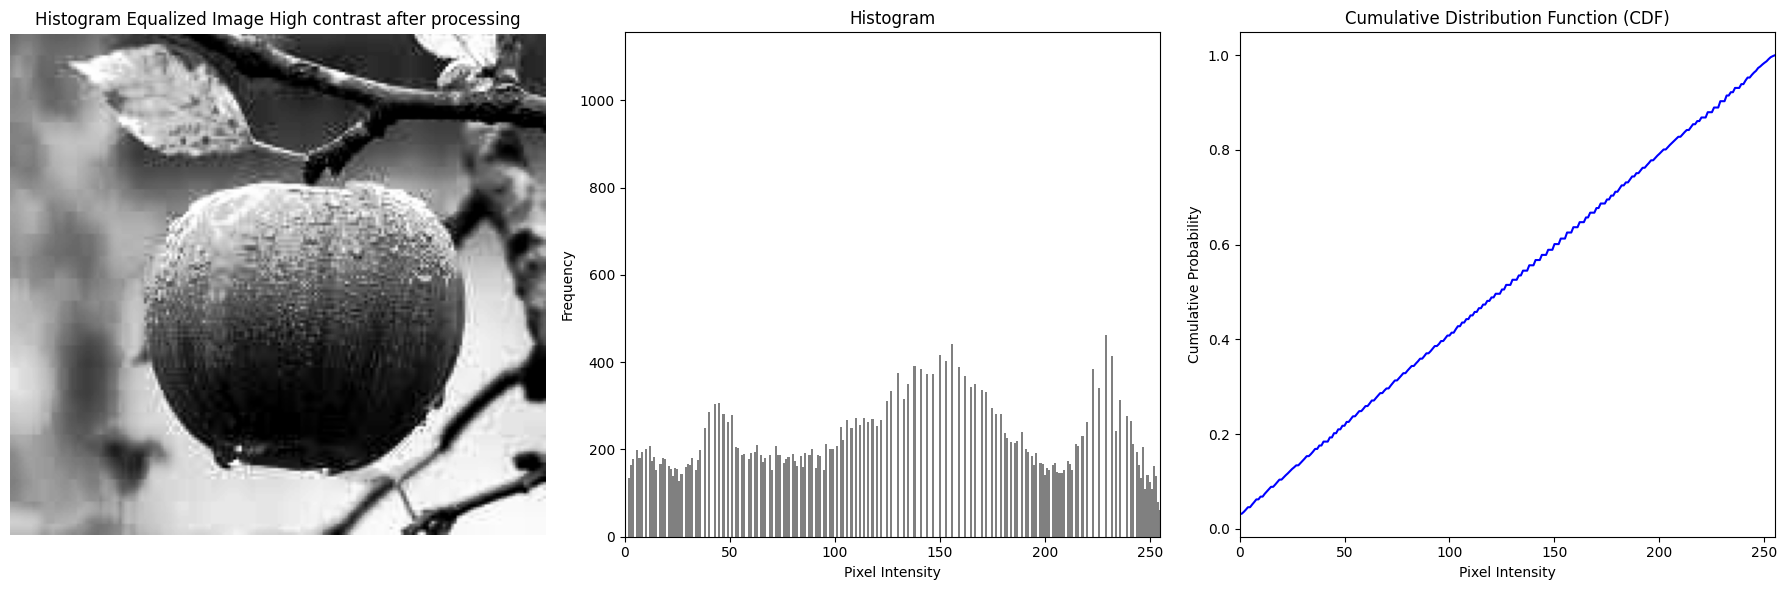

In [37]:
for img, name in zip((dark_image, bright_image, low_contrast_image, high_constrast_image),( 'Dark', 'Bright', 'Low contrast', 'High contrast')):
    display_image_hist_and_cdf(img, name = name+' before processing')
    img_equalised = histogram_equalisation(img)
    display_image_hist_and_cdf(img_equalised, name=name+' after processing')

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 4 Changing color channels

Programatically, the color channels are either the -1st (last) or the 0th (first) dimension of an image. With this in mind, we can freely swap channels around, for example to make RGB images BGR instead.

---

#### 💻 **4.1. Swap the channels of the below image to make it BGR instead of RGB (should swap blue for red and vice versa)**

</span>

In [ ]:
# Load image and convert to numpy array, as normal
image_path = os.path.join('images', 'img_1.jpg')
rgb_image_path = os.path.join('images', 'img_1.jpg')
rgb_image = np.array(Image.open(rgb_image_path))
print("RGB image shape (height, width, channels):", np.array(rgb_image).shape)

def rgb_to_bgr(rgb_image):

    # Swap channels of the rgb image to make a corresponding bgr image
    bgr_image = ...

    return bgr_image

bgr_image = rgb_to_bgr(rgb_image)

# Show the image
fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].imshow(rgb_image, vmin=0, vmax=255)
axs[0].set_title('RGB Image')
axs[0].axis('off')
axs[1].imshow(bgr_image, vmin=0, vmax=255)
axs[1].set_title('BGR Image')
axs[1].axis('off')
plt.show()

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 5 Color distribution

Looking at the relative frequency of different colors in an image can be useful way to collect summary statistics on the image in general

---

#### **5.1. Examine the color histograms of the different images in the week1/images folder, or ones you find yourself, do they make sense? What do they tell you about the image itself?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **5.2. Try modifying some of the colors by fixed amounts, either by multiplying with, or adding scalar values, how do the histograms change... What should you be cognisant of in these cases?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **💻 5.3. Switch ```density=True``` so the plot normalizes each histogram by total number of values of that color to get a "CDF" of pixel values**

#### **5.4. What is the potential value of doing this normalization by number of pixels vs not normalizing?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>



In [ ]:
def show_color_distribution(image, density=False):
    """
    Display the distribution of pixels in each color channel (RGB) of an image.
    
    Parameters:
    - image: NumPy array representing the image.
    """
    # Split the image into its color channels
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    # Show the original image
    axs[0].set_title('Image')
    axs[0].imshow(image, vmin=0, vmax=255)
    axs[0].axis('off')
    
    # Plot the histogram of each of the color channels
    colors = ('b', 'g', 'r')
    channel_names = ('Blue', 'Green', 'Red')
    for i, (color, channel_name) in enumerate(zip(colors, channel_names)):
        axs[i + 1].hist(image[..., i].flatten(), bins=256, color=color, alpha=0.7, density=density)
        axs[i + 1].set_title(f'{channel_name} Channel')
        axs[i + 1].set_xlabel('Pixel Intensity')
        axs[i + 1].set_ylabel('Frequency')
        axs[i + 1].set_xlim([0, 256])
    
    plt.tight_layout()
    plt.show()

# Change density to false to go to frequency rather than number view
show_color_distribution(rgb_image, density=True)


NameError: name 'rgb_image' is not defined

<span style="color: #E6E6E6;">
<span style="background-color: #00695C; padding:8px; display:block; border-left:4px solid #4682b4">

## Part 2 Distance Metrics and simliarity measures

Distance metrics (often "Incorrectly" called 'norms') can be considered as a ways of measuring simliarity between two datums. You should already have learned about (and used) the concept in 02450, but given their importance, they are recapped here (somewhat informally).

---

A distance metric is a pair of a **set $\mathcal{M}$** and a **function $d$** such that: $d: \mathcal{M} \times \mathcal{M} \rightarrow \mathbb{R}$, I.E a function that takes two elements from a set and spits out a real number that compares them. 

Apart from this, it must also satisfy the following conditions (also mentioned in slide w1 slide 39)

1. **Non-negativity**  
   &nbsp;&nbsp;&nbsp;&nbsp;$d(x,y) \geq 0 \quad \forall x \forall y$  
   &nbsp;&nbsp;&nbsp;&nbsp;*A distance can never be negative.*

2. **Indiscernibility of identities**  
   &nbsp;&nbsp;&nbsp;&nbsp;$d(x, y) = 0 \iff x = y$  
   &nbsp;&nbsp;&nbsp;&nbsp;*A distance is zero only if we compare an element with itself.*

3. **Symmetry**
   &nbsp;&nbsp;&nbsp;&nbsp;$d(x,y) = d(y,x) \quad \forall x \forall y$  
   &nbsp;&nbsp;&nbsp;&nbsp;*A distance from $a$ to $b$ is the same as from $b$ to $a$.*

4. **Triangle inequality**  
   &nbsp;&nbsp;&nbsp;&nbsp;$d(x,z) \leq d(x,y) + d(y,z) \quad \forall x \forall y \forall z$  
   &nbsp;&nbsp;&nbsp;&nbsp;*The distance from $a$ directly to $c$ is always shorter than or equal to $a$ to $b$ to $c$.*

---

In this course, we work with the following norms:

- **Minkowski (p-norm)**:
  - $d_p(x,y) = \left(\sum^n_{i=1} |x_i - y_i|^p \right)^{\frac{1}{p}} \quad \forall p | p \geq 1$

And thats it... Manhattan (absolute)  and Euclidian are also included in this. Do note, that **the Minkowski is only a true distance metric (and norm) for** $p \geq 1$


As for **similarity measures** (for which the above requirements do not apply), we also use:

- **Cosine similarity** (a sort of angle between vectors)
  - $d_{cossim}(x,y) = \frac{\mathbf{x} \cdot \mathbf{y} } {||\mathbf{x}|| \space ||\mathbf{y}||}$
  - $ = \frac{\sum^n_{i=1} x_i y_i}{\sqrt{\sum^n_{i=1}x_i^2} \sqrt{\sum^n_{i=1} y^2_i}}$ 
    - $1$: Vectors point to same direction 
    - $0$: Vectors are orthogonal (90 degree angle to one another)
    - $-1$: Vectors point in opposite directions
- **Squared (euclidian)** distance (not a distance metric)
  - $d_{SE}(x,y) = \left(\sum^n_{i=1} (x_i - y_i)^2 \right)$
  - Often used for loss calculation (you may have seen that already)


</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 6 Considering distance measures

As mentioned, the squared distance somewhat unintuitively is not a true distance metric, same goes for the cosine distance.

*TIP: Remember when **disproving** something in mathematics, you only need to show **one** example where it is not the case*

---

#### **6.1. Argue why the squared distance is *not* a distance metric (Hint: It does not satisfy the triangle inequality)**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **6.2. Argue for why the cosine distance is not a true distance metric**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

#### **6.3. As mentioned above, the Minkowski distance is only a true distance measure for $p \geq 1$, why is this?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">

### Exercise 7 Implementing distance measures

Implementing distance measure in Python is often unecessary, as most mathematical computation packages include them already, but it is good practice nonetheless

---

#### 💻 **7.1. Implement the Euclidian, manhattan, cosine, and minkowski distances below respectively, you may be tempted to use built-in numpy functions, do not**

#### 💻 **7.2. Verify your implementations with the plot_distance_heatmap function two cells below**

</span>

In [ ]:
def euclidean_distance(vec1, vec2, *args):
    euclid_dist = ...
    return euclid_dist

def manhattan_distance(vec1, vec2, *args):
    manhattan_dist = ...
    return manhattan_dist

def cosine_distance(vec1, vec2, *args):
    "Please remember this is the cosine *distance*"
    dot_product = ...
    norm_vec1 = ...
    norm_vec2 = ...

    return ...

def minkowski_distance(vec1, vec2, p):
    minkowski_dist = ...
    return minkowski_dist



In [ ]:
def plot_distance_heatmap(distance_metrics, x_range=(-20, 20), y_range=(-20, 20), resolution=200, names='', **kwargs):
    """
    Plots a heatmap of the given distance metric for 2D vectors over a specified range.

    Parameters:
    - distance_metric: A function that takes two 2D vectors and returns a scalar distance.
    - x_range: A tuple specifying the range of x values (min, max).
    - y_range: A tuple specifying the range of y values (min, max).
    - resolution: The number of points along each axis.
    """
    # Generate a grid of points
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    ps = kwargs.get('ps', [None for el in distance_metrics])
    
    fig, axs = plt.subplots(nrows=ceil(len(distance_metrics) / 2), ncols=2, figsize=(8, 6))
    
    for idx, (name, metric, ax) in enumerate(zip(names, distance_metrics, axs.flatten())):
        # Compute the distance metric for each point in the grid
        Z = np.zeros_like(X)
        for i in range(resolution):
            for j in range(resolution):
                vector = np.array([X[i, j], Y[i, j]])
                Z[i, j] = metric(vector, np.array([1e-5, 1e-5]), ps[idx])
        # Plot the heatmap
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.grid("both")
        ax.set_title(f'{name}')
        cont = ax.contourf(X, Y, Z, cmap='viridis')
        fig.colorbar(cont, label='Distance', ax=ax)
    plt.tight_layout()
    plt.show()

Bear in mind that we are comparing against a vector Z=[10^-5, 10^-5]. It is basically 0, but the direction is relevant for cosine distance.


In [ ]:
plot_distance_heatmap((euclidean_distance, manhattan_distance, cosine_distance), names=("Euclidean", "Manhattan", "Cosine",))

In [ ]:
plot_distance_heatmap((manhattan_distance, minkowski_distance, euclidean_distance, minkowski_distance), names=("Manhattan", "L1 norm", "Euclidean", 'L2 norm'), ps=[1, 1, 2, 2])

In [ ]:
ps = [1, 1e-1, 1e-2, 1e-3]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)


In [ ]:
ps = [1, 0.9, 0.75, 0.5]
plot_distance_heatmap([minkowski_distance for _ in ps], names=[f'Minowski p={val}' for val in ps], ps=ps)

<span style="color: #E6E6E6;">
<span style="background-color: #545454; padding:8px; display:block; border-left:4px solid #4682b4">


### Exercise 7 - Usecases of distances

#### **7.1. Find uses cases where it is most beneficial to use the Manhattan, Euclidian, and Cosine distance measure respectively**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>


#### **7.2. What happens with the minkowski distance as $p \rightarrow \infty$? If we use this to compare two distances with one another, what does it measure?**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>


#### **7.3. What happens withe the minkowski distance as $p \rightarrow 0$? If we use this to compare two distances with one another, what does it measure? (Assume this is real analysis, and that $0^0 = 0$**

<span style="background-color: #00590D; padding:8px; display:block; border-left:4px solid #4682b4">

Your answer here $\dots$

</span>

</span>